In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random, warnings
from sklearn.neighbors import KernelDensity
warnings.filterwarnings("ignore")

**When KDE ?** <br />
=>  when data does not follow any distribution and it is completely random

**How does KDE work ?** <br />
=> based on kernel (gaussian) it takes every data point and create a dist around it
=> the final prob will be the sum of all the dist in y direction at that point

**Deciding Std values** || **Also Known as Bandwidth for kde**
-  if std is very low , graph will be peaked
-  if std is very hig , graph will be normal/flatted

In [2]:

sample1 =  np.random.normal(loc=15,scale=2,size=500)
sample2 =  np.random.normal(loc=25,scale=3,size=500)
sample =  np.hstack((sample1,sample2))
sample[:5]

array([14.3170223 , 19.84030337, 15.40896206, 17.92532808, 15.9253343 ])

(array([ 2.,  1.,  1.,  3.,  0.,  5.,  4.,  4.,  7.,  6., 12., 10., 10.,
        13., 10., 13., 26., 16., 29., 23., 21., 24., 21., 24., 22., 22.,
        18., 21., 21., 20., 24., 17.,  9., 10., 10.,  5.,  7.,  1.,  5.,
        11.,  6.,  5.,  7.,  4.,  6.,  4.,  8.,  5.,  7.,  7.,  6.,  9.,
         8., 11.,  7.,  8., 10., 13., 14., 13., 17., 14., 11., 13., 24.,
        17., 16.,  8., 12., 26.,  9., 13., 16., 20., 14., 15., 15.,  8.,
        13., 14.,  5.,  3.,  4.,  5.,  1.,  2.,  5.,  2.,  1.,  3.,  1.,
         0.,  2.,  0.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([ 9.89623102, 10.13011187, 10.36399271, 10.59787356, 10.83175441,
        11.06563525, 11.2995161 , 11.53339695, 11.76727779, 12.00115864,
        12.23503949, 12.46892033, 12.70280118, 12.93668203, 13.17056287,
        13.40444372, 13.63832457, 13.87220541, 14.10608626, 14.33996711,
        14.57384795, 14.8077288 , 15.04160965, 15.27549049, 15.50937134,
        15.74325219, 15.97713303, 16.21101388, 16.44489473, 16.678775

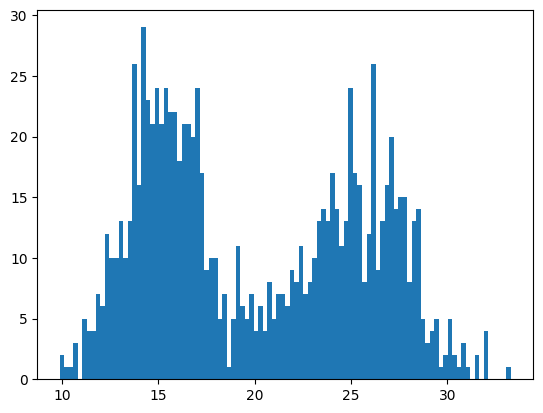

In [3]:
plt.hist(sample,bins=100)

In [4]:
model =  KernelDensity(bandwidth=5,kernel="gaussian") # bandwith = std
model.fit(sample.reshape((len(sample),1)))

KernelDensity(bandwidth=5)

In [5]:
values = np.linspace(sample.min(),sample.max(),100)
values =  values.reshape((len(values),1)) #just 2d array

In [6]:
probs =  model.score_samples(values) # returns log values of probs
probs =  np.exp(probs) # so cancel out with exp

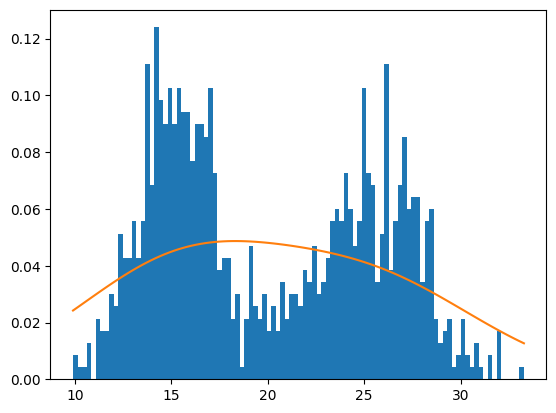

In [7]:
plt.hist(sample,bins=100,density=True)
plt.plot(values,probs)

<Axes: ylabel='Density'>

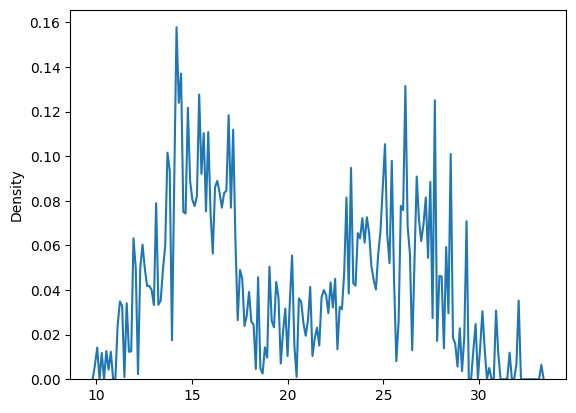

In [11]:
sns.kdeplot(sample,bw_adjust=0.02) # bandwidth = 0.02